In [1]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

In [0]:
!pip install yfinance

# 주식 정보 가져오기 
- yahoo finance API 활용
- https://pypi.org/project/yfinance/

# 종목코드 예시 
- 미국기업 : 'MSFT' 
- 한국기업 : '005930.KS' (삼성)
- 인덱스 : '^KS11'

# 종목코드 (Ticker symbol) 조회하기
- https://finance.yahoo.com/ 
- https://finance.naver.com/
- http://kind.krx.co.kr/corpgeneral/corpList.do?method=download  (한국거래소)

# 포트폴리오 평가
- 여러 조합으로 자산 포트폴리오를 구성한 뒤에 Return, Risk, Sharpe Ratio 비교 평가
- 미국의 Tech기업, 한국의 Tech기업의 투자 포트폴리오 비교해보기

# 데이터 가져오기, 시각화

In [2]:
Tech_US =['MSFT', 'NFLX', 'FB', 'AMZN']   # 마이크로소프트 , 넷플릭스, 페이스북, 아마존 
Tech_KR =['005930.KS','000660.KS','035420.KS', '035720.KS' ] #삼성, SK하이닉스, 네이버, 카카오   

In [3]:
yf.Ticker('MSFT').history(start='2018-04-01', end='2020-03-31')

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2018-04-02,87.56,87.96,84.70,85.68,48515400,0.0,0
2018-04-03,86.70,87.16,85.07,86.83,37213800,0.0,0
2018-04-04,85.03,89.78,84.91,89.36,35560000,0.0,0
2018-04-05,89.47,90.08,88.46,89.41,29771900,0.0,0
2018-04-06,88.55,89.49,86.60,87.33,38026000,0.0,0
...,...,...,...,...,...,...,...
2020-03-24,143.35,149.18,140.88,147.93,82516700,0.0,0
2020-03-25,148.50,153.90,144.04,146.51,75638200,0.0,0
2020-03-26,147.99,156.22,147.96,155.68,64568100,0.0,0


In [4]:
# price, dividends를 가져오는 함수를 정의
def get_price(companies):
  df=pd.DataFrame()
  for company in companies:
    df[company]=yf.Ticker(company).history(start='2018-04-01', end='2020-03-31')['Close']
  return df

def get_div(companies):
  df=pd.DataFrame()
  for company in companies:
    df[company]=yf.Ticker(company).history(start='2018-04-01', end='2020-03-31')['Dividends']
  return df

#US, KR 테크 기업의 주식 가격 
p_US=get_price(Tech_US)
p_KR=get_price(Tech_KR)
p_KR.columns=['SS', 'SKH', 'NVR', 'KKO']
#US, KR 테크기업의 배당금
d_US= get_div(Tech_US)
d_KR= get_div(Tech_KR)

In [5]:
d_KR.columns=['SS', 'SKH', 'NVR', 'KKO']
d_KR.sum()

SS     1062.0
SKH    1500.0
NVR     314.0
KKO       0.0
dtype: float64

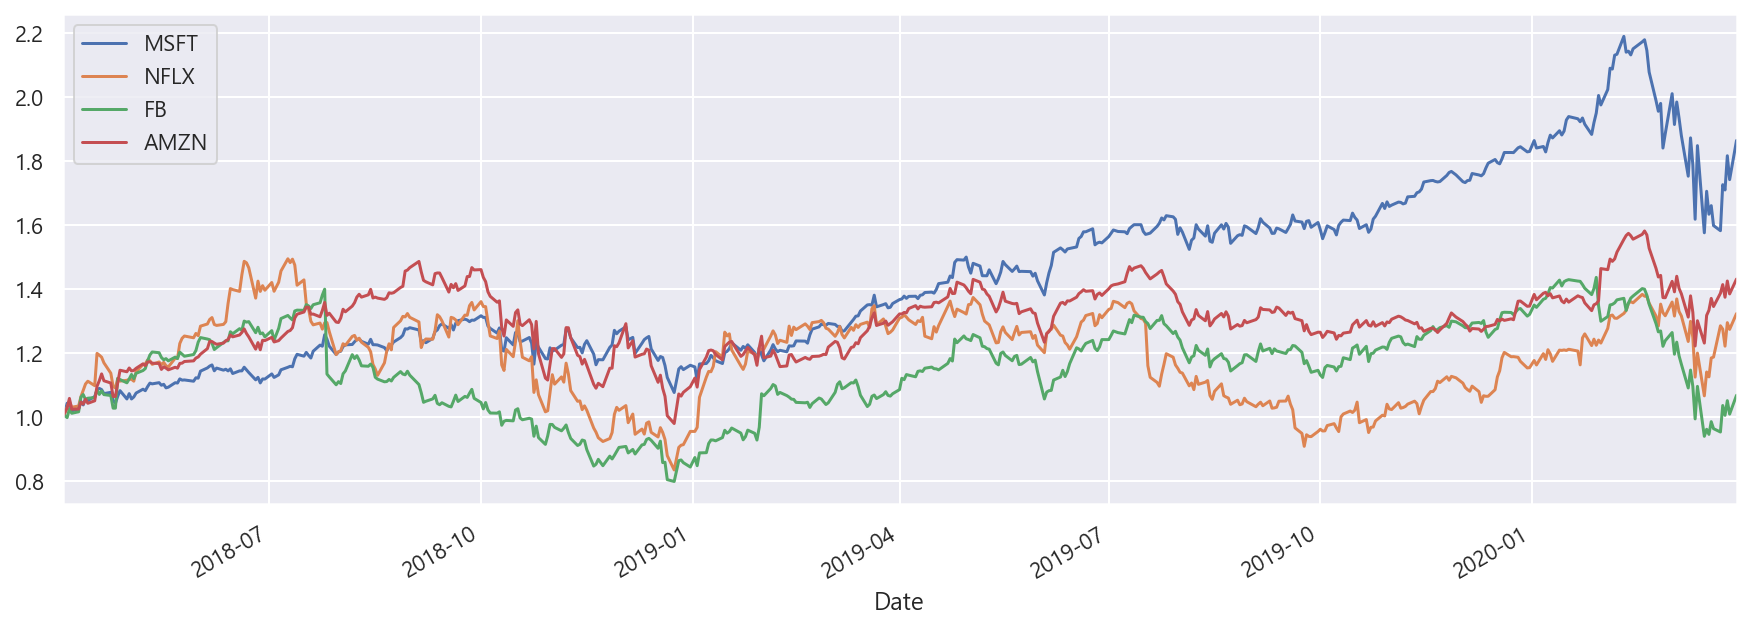

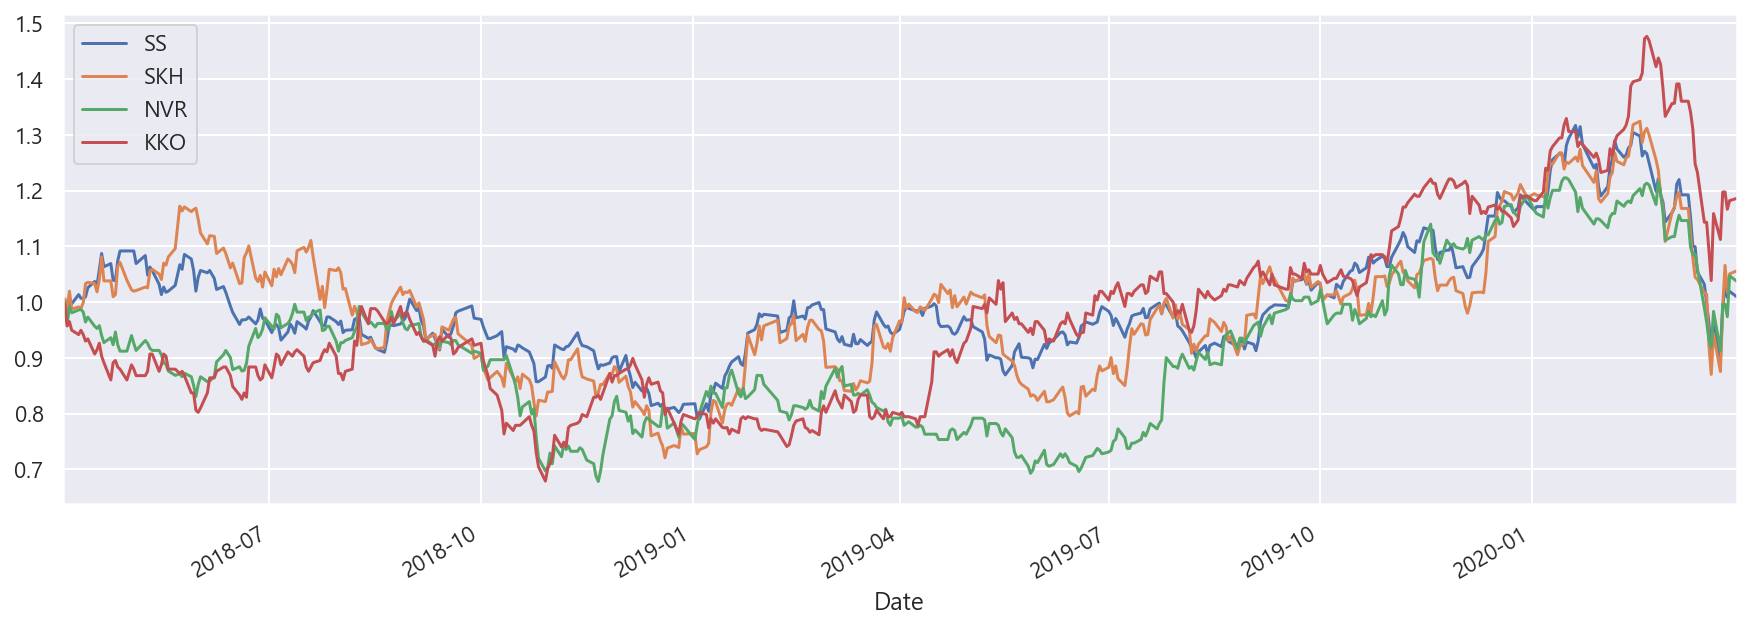

In [6]:
# plotting
(p_US/p_US.iloc[0]).plot(figsize=(15,5))
(p_KR/p_KR.iloc[0]).plot(figsize=(15,5))

# Return 계산
![대체 텍스트](https://drive.google.com/uc?id=1ArzBrZPnNmoSuVjEMz0XXSr-4MreD3G5)

In [7]:
# Daily Return 
r_US=p_US/p_US.shift()-1 
r_KR=p_KR/p_KR.shift()-1 

In [8]:
# Average Return (Total period)
r_a_US=(p_US.iloc[-1]+d_US.sum())/p_US.iloc[0]-1
r_a_KR=(p_KR.iloc[-1]+d_KR.sum())/p_KR.iloc[0]-1

In [9]:
# Averate Return (Daily)
r_a_d_US=(1+r_a_US)**(1/p_US.shape[0])-1
r_a_d_KR=(1+r_a_KR)**(1/p_KR.shape[0])-1

# Portfolio Returns

In [10]:
# 전체 포트폴리오 수익 : weights를 0.25, 0.25, 0.25, 0.25로 투자한 경우를 가정
weights=np.array([0.25, 0.25, 0.25, 0.25])
weights

array([0.25, 0.25, 0.25, 0.25])

In [11]:
port_return_US = np.dot(weights, r_a_US)
port_return_KR = np.dot(weights, r_a_KR)
port_return_KR

0.08323592546382547

In [12]:
print(port_return_US)
print(port_return_KR)

0.4327337948697895
0.08323592546382547


# Portfolio Risk
![대체 텍스트](https://drive.google.com/uc?id=1CtgKMDEigvHpR2aiucmlPqddLADIhH23)


In [0]:
covar_US= r_US.cov()*252
covar_KR= r_KR.cov()*252

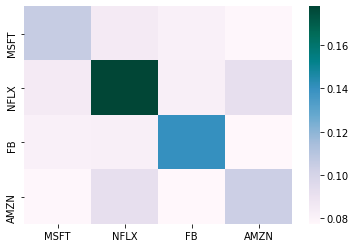

In [0]:
sns.heatmap(covar_US, cmap='PuBuGn')

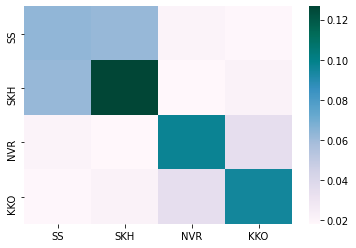

In [0]:
sns.heatmap(covar_KR, cmap='PuBuGn')

In [0]:
port_risk_US= np.dot(weights.T, np.dot(covar_US, weights))
print(port_risk_US)
port_risk_KR= np.dot(weights.T, np.dot(covar_KR, weights))
print(port_risk_KR)

0.09504846938361033
0.04584651723295235


# Sharpe ratio

In [0]:
rf=0.02
port_sr_US= (port_return_US-rf)/port_risk_US
port_sr_KR= (port_return_KR-rf)/port_risk_KR
print(port_sr_US)
print(port_sr_KR)

4.342692243183772
2.4058664525003985


# 시각화


In [0]:
#                    KR     US 
# Return 
# Risk 
# sharpe ration

In [0]:
result=np.array([[port_return_KR, port_return_US], [port_risk_KR, port_risk_US], [port_sr_KR, port_sr_US]])
result=np.round(result, 3)

In [0]:
result=pd.DataFrame(result)
result.columns=['KR', 'US']
result.index=['Return', 'Risk', 'Sharpe ratio']
result

,KR,US
Return,0.130,0.433
Risk,0.046,0.095
Sharpe ratio,2.406,4.343


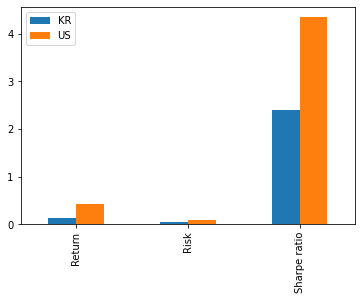

In [0]:
result.plot(kind='bar')